<h1><center>SELF ORGANIZING MAPS </center></h1>

<h2><center>INTRODUCTION TO NEUPY </center></h2>

## 1. OVERVIEW

http://neupy.com/2017/12/09/sofm_applications.html

As in case of any neural network algorithms the main building blocks for SOFM are neurons. Each neuron typically connected to some other neurons, but number of this connections is small. Each neuron connected just to a few other neurons that we call close neighbors. There are many ways to arrange these connections, but the most common one is to arrange them into two-dimensional grid.

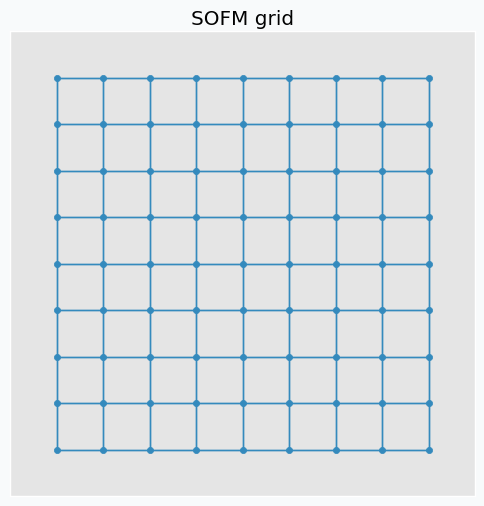

Each blue dot in the image is neuron and line between two neurons means that they are connected. We call this arrangement of neurons grid.

Each neuron in the grid has two properties: position and connections to other neurons. We define connections before we start network training and position is the only thing that changes during the training. There are many ways to initialize position for the neurons, but the easiest one is just to do it randomly. After this initialization grid won’t look as nice as it looks on the image above, but with more training iteration problem can be solved.

Let’s talk about training. In each training iteration we introduce some data point and we try to find neuron that closest to this point. Neuron that closest to this point we call neuron winner. But, instead of updating position of this neuron we find its neighbors. Note, that it’s not the same as closest neighbors. Before training we specify special parameter known as learning radius. It defines the radius within which we consider other neuron as a neighbors. On the image below you can see the same grid as before with neuron in center that we marked as a winner. You can see in the pictures that larger radius includes more neurons.

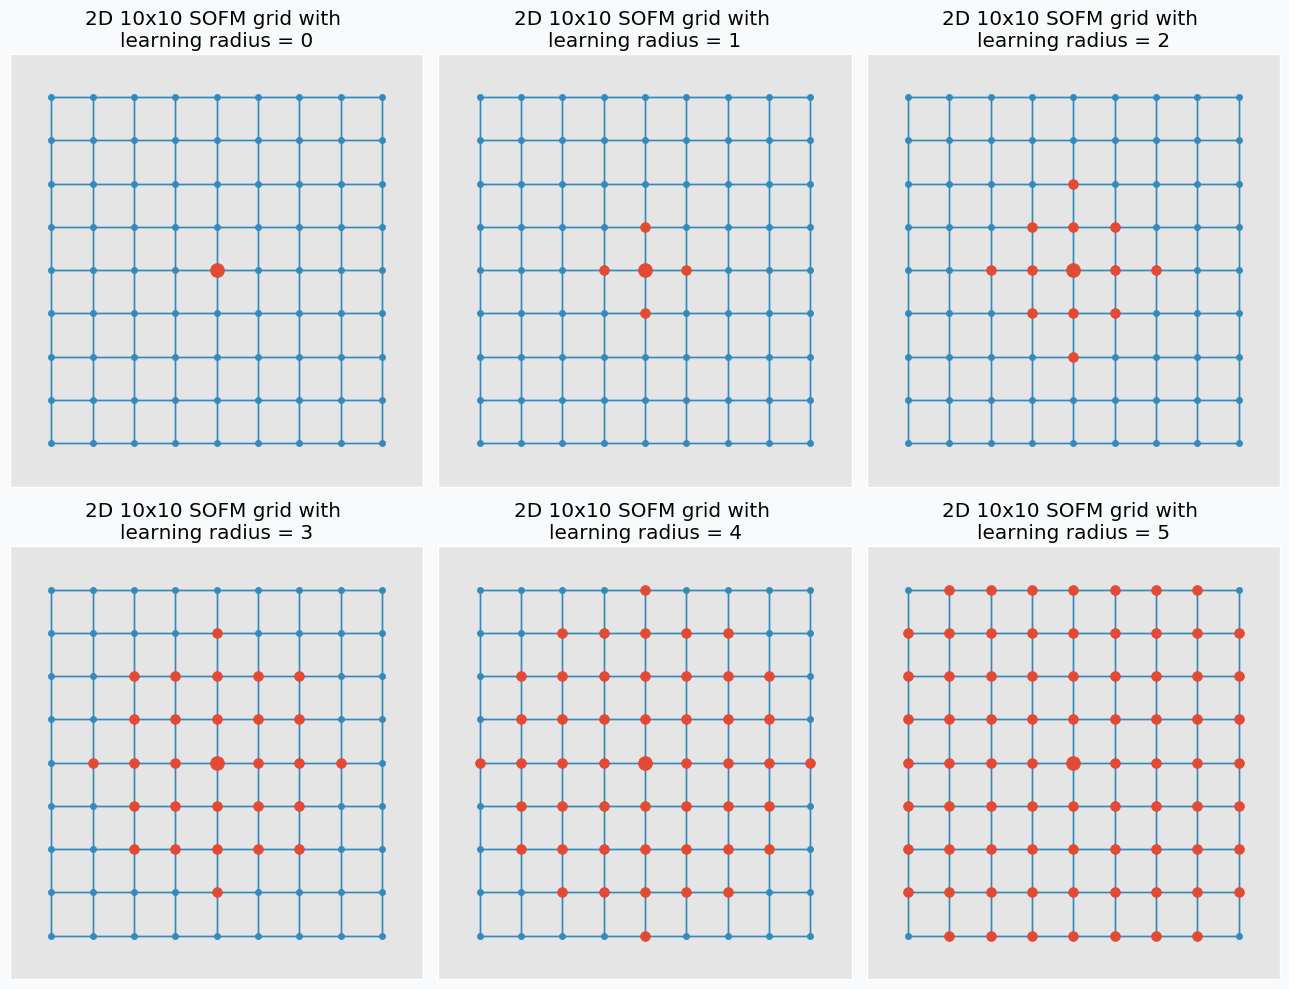

And at the end of the iteration we update our neuron winner and its neighbors positions. We change their position by pushing closer to the data point that we used to find neuron winner. We “push” winner neuron much closer to the data point compared to the neighbor neurons. In fact, the further the neighbors the less “push” it get’s towards the data point. You can see how we update neurons on the image below with different learning radius parameters.

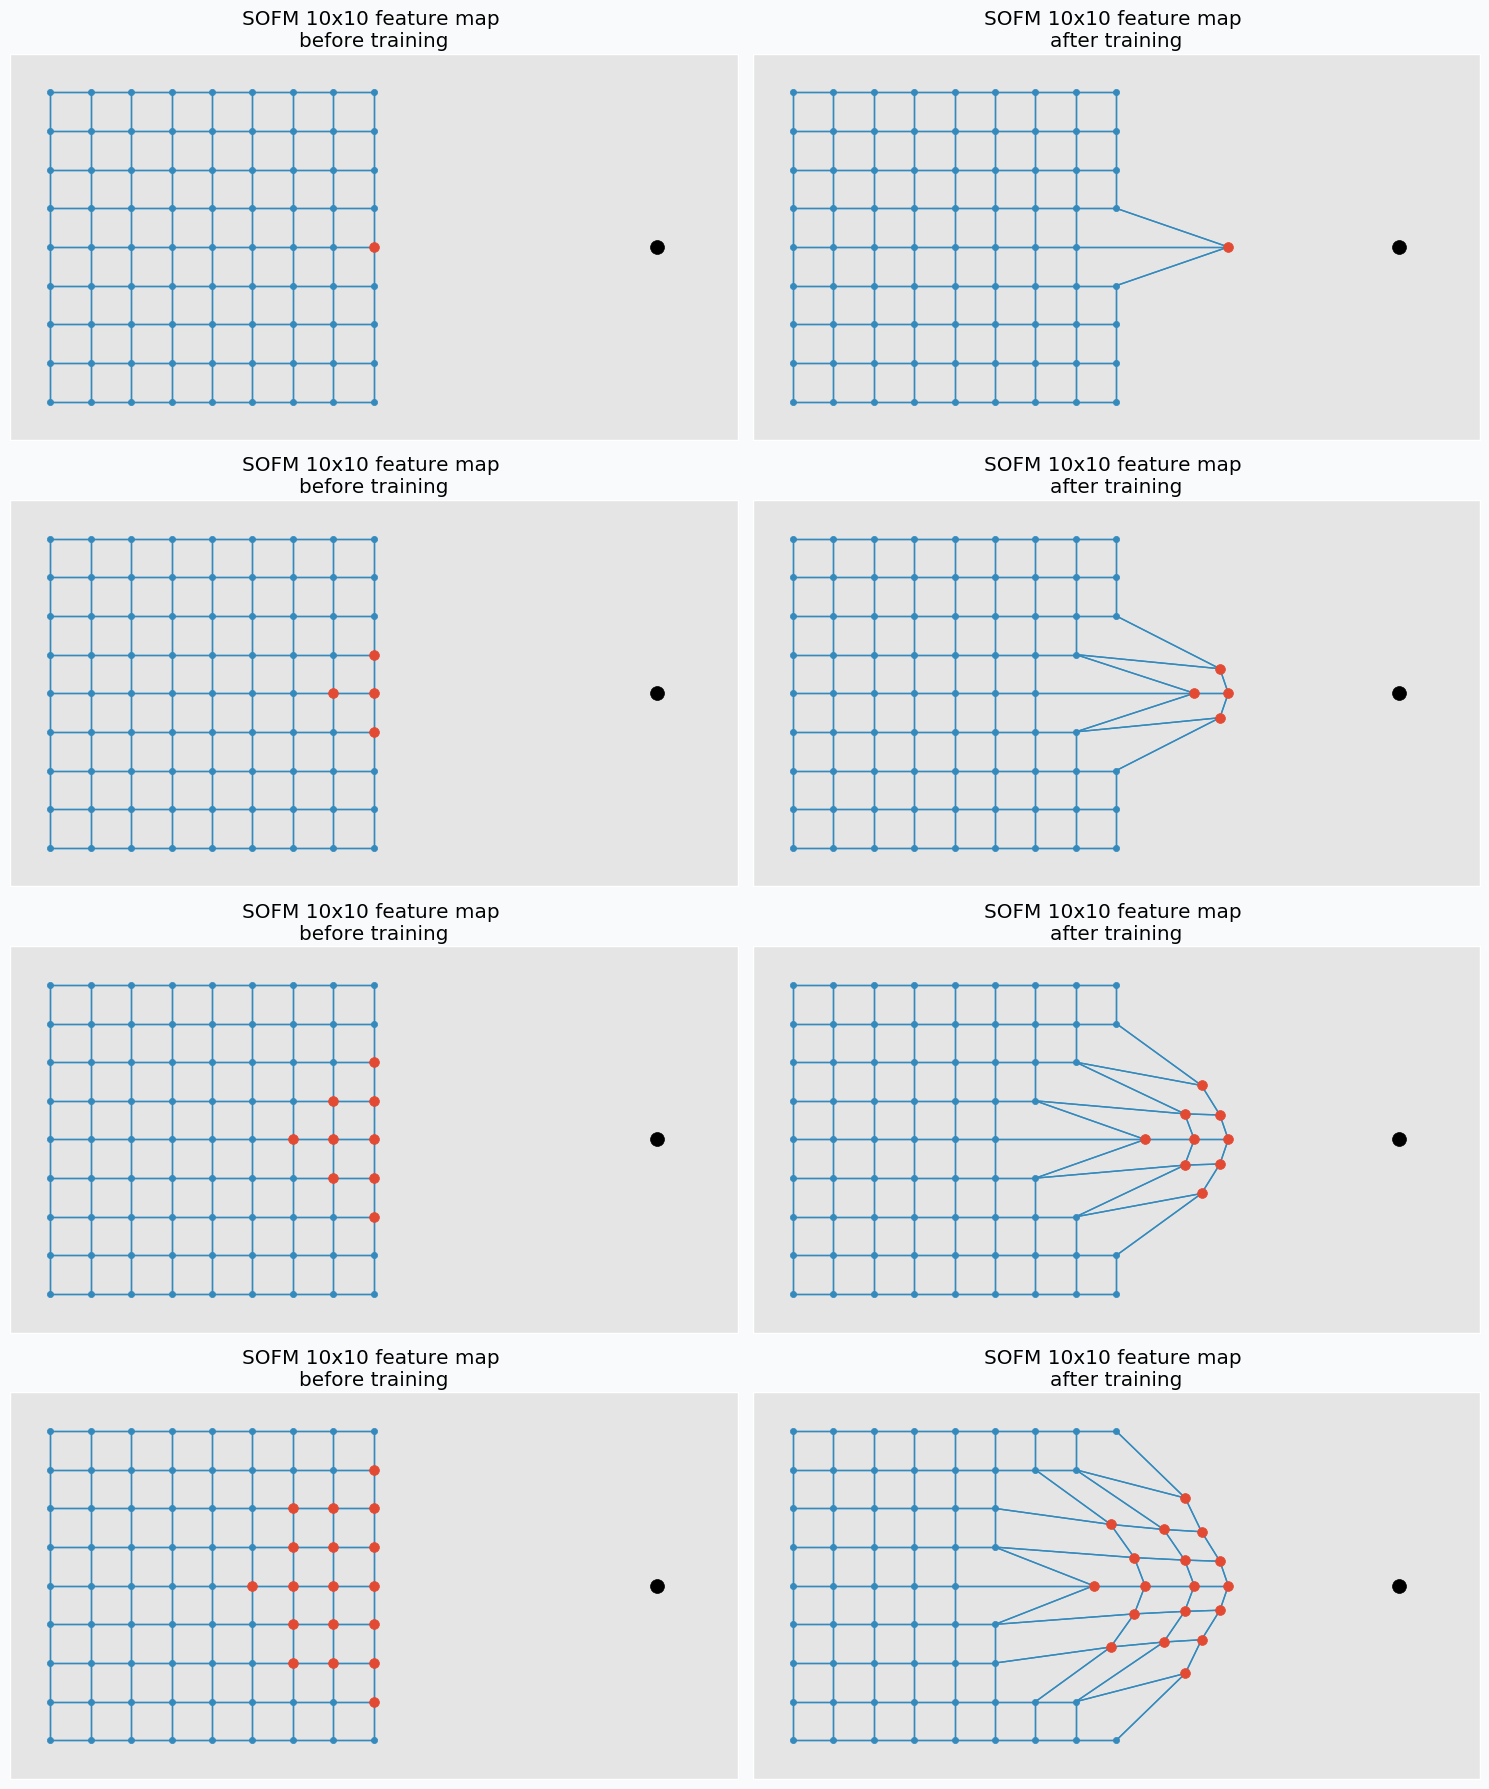

## 2. EXAMPLES

### 2.1.  A VERY SIMPLE SOM

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from neupy import algorithms, utils


utils.reproducible()
plt.style.use('ggplot')


X = np.array([
    [0.1961, 0.9806],
    [-0.1961, 0.9806],
    [0.9806, 0.1961],
    [0.9806, -0.1961],
    [-0.5812, -0.8137],
    [-0.8137, -0.5812],
])

sofmnet = algorithms.SOFM(
    n_inputs=2,
    n_outputs=3,

    step=0.5,
    show_epoch=20,
    shuffle_data=True,
    verbose=True,

    learning_radius=0,
    features_grid=(3, 1),
)




Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = [3, 1]
[OPTION] grid_type = ['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid']
[OPTION] learning_radius = 0
[OPTION] n_inputs = 2
[OPTION] n_outputs = 3
[OPTION] reduce_radius_after = 100
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] show_epoch = 20
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] std = 1
[OPTION] step = 0.5
[OPTION] verbose = True
[OPTION] weight = Normal(mean=0, std=0.01)



#1 : [2 ms] train: 0.502381
#20 : [998 μs] train: 0.128617
#40 : [7 ms] train: 0.123602
#60 : [0 ns] train: 0.121870
#80 : [0 ns] train: 0.118602
#100 : [0 ns] train: 0.117317
> Start plotting


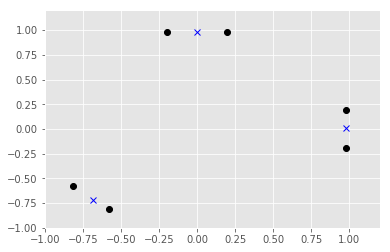

[[1 0 0]]
[[1 0 0]]
[[0 0 1]]
[[0 0 1]]
[[0 1 0]]
[[0 1 0]]


In [6]:
plt.plot(X.T[0:1, :], X.T[1:2, :], 'ko')
sofmnet.train(X, epochs=100)

print("> Start plotting")
plt.xlim(-1, 1.2)
plt.ylim(-1, 1.2)

plt.plot(sofmnet.weight[0:1, :], sofmnet.weight[1:2, :], 'bx')
plt.show()

for data in X:
    print(sofmnet.predict(np.reshape(data, (2, 1)).T))

### 2.2.CLUSTERING 

Clustering is probably the most trivial application where you can use SOFM. In case of clustering, we treat every neuron as a centre of separate cluster. One of the problems is that during the training procedure when we pull one neuron closer to one of the cluster we will be forced to pull its neighbors as well. In order to avoid this issue, we need to break relations between neighbors, so that any update will not have influence on other neurons. If we set up this value as 0 it will mean that neuron winner doesn’t have any relations with other neurons which is exactly what we need for clustering.

In the image below you can see visualized two features from the iris dataset and there are three SOFM neurons colored in grey. As you can see it managed to find pretty good centers of the clusters.

In [11]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from neupy import algorithms, utils


plt.style.use('ggplot')
utils.reproducible()


if __name__ == '__main__':
    ggplot_colors = plt.rcParams['axes.prop_cycle']
    colors = np.array([c['color'] for c in ggplot_colors])

    dataset = datasets.load_iris()
    # use only two features in order
    # to make visualization simpler
    data = dataset.data[:, [2, 3]]
    target = dataset.target

    sofm = algorithms.SOFM(
        # Use only two features for the input
        n_inputs=2,

        # Number of outputs defines number of features
        # in the SOFM or in terms of clustering - number
        # of clusters
        n_outputs=20,

        # In clustering application we will prefer that
        # clusters will be updated independently from each
        # other. For this reason we set up learning radius
        # equal to zero
        learning_radius=0,

        # Training step size or learning rate
        step=0.25,

        # Shuffles dataset before every training epoch.
        shuffle_data=True,

        # Instead of generating random weights
        # (features / cluster centers) SOFM will sample
        # them from the data. Which means that after
        # initialization step 3 random data samples will
        # become cluster centers
        weight='sample_from_data',

        # Shows training progress in terminal
        verbose=True,
    )
    sofm.train(data, epochs=200)



Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = None
[OPTION] grid_type = ['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid']
[OPTION] learning_radius = 0
[OPTION] n_inputs = 2
[OPTION] n_outputs = 20
[OPTION] reduce_radius_after = 100
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] std = 1
[OPTION] step = 0.25
[OPTION] verbose = True
[OPTION] weight = sample_data

#1 : [40 ms] train: 0.110516
#2 : [35 ms] train: 0.094544
#3 : [23 ms] train: 0.089421
#4 : [31 ms] train: 0.090378
#5 : [31 ms] train: 0.089767
#6 : [31 ms] train: 0.088114


#7 : [24 ms] train: 0.086877
#8 : [39 ms] train: 0.085768
#9 : [31 ms] train: 0.084161
#10 : [12 ms] train: 0.085085
#11 : [31 ms] train: 0.083308
#12 : [47 ms] train: 0.082910
#13 : [16 ms] train: 0.083095


#14 : [46 ms] train: 0.082812
#15 : [34 ms] train: 0.081511
#16 : [35 ms] train: 0.082443
#17 : [25 ms] train: 0.082018
#18 : [16 ms] train: 0.084072
#19 : [31 ms] train: 0.083200
#20 : [31 ms] train: 0.081940


#21 : [37 ms] train: 0.081050
#22 : [16 ms] train: 0.083701
#23 : [49 ms] train: 0.081888
#24 : [18 ms] train: 0.082177
#25 : [31 ms] train: 0.083486
#26 : [31 ms] train: 0.082436
#27 : [31 ms] train: 0.082598
#28 : [16 ms] train: 0.083484


#29 : [53 ms] train: 0.082683
#30 : [32 ms] train: 0.082802
#31 : [35 ms] train: 0.083922
#32 : [20 ms] train: 0.083789
#33 : [31 ms] train: 0.083214
#34 : [31 ms] train: 0.083028
#35 : [33 ms] train: 0.083129


#36 : [31 ms] train: 0.083877
#37 : [32 ms] train: 0.083202
#38 : [35 ms] train: 0.081496
#39 : [23 ms] train: 0.082981
#40 : [31 ms] train: 0.080451
#41 : [35 ms] train: 0.083990
#42 : [31 ms] train: 0.081861


#43 : [32 ms] train: 0.082376
#44 : [35 ms] train: 0.083051
#45 : [31 ms] train: 0.083440
#46 : [21 ms] train: 0.083122
#47 : [31 ms] train: 0.081927
#48 : [16 ms] train: 0.081333
#49 : [31 ms] train: 0.081872
#50 : [31 ms] train: 0.084033


#51 : [39 ms] train: 0.082385
#52 : [36 ms] train: 0.081156
#53 : [28 ms] train: 0.081394
#54 : [21 ms] train: 0.082796
#55 : [31 ms] train: 0.082061
#56 : [16 ms] train: 0.082616
#57 : [31 ms] train: 0.082526
#58 : [31 ms] train: 0.082419


#59 : [40 ms] train: 0.082344
#60 : [38 ms] train: 0.082840
#61 : [31 ms] train: 0.081076
#62 : [16 ms] train: 0.082734
#63 : [31 ms] train: 0.081426
#64 : [31 ms] train: 0.081359
#65 : [31 ms] train: 0.081752


#66 : [37 ms] train: 0.081394
#67 : [41 ms] train: 0.082445
#68 : [36 ms] train: 0.082670
#69 : [24 ms] train: 0.082236
#70 : [31 ms] train: 0.081441
#71 : [31 ms] train: 0.081052
#72 : [16 ms] train: 0.081312


#73 : [46 ms] train: 0.082001
#74 : [35 ms] train: 0.081468
#75 : [34 ms] train: 0.082529
#76 : [24 ms] train: 0.080951
#77 : [31 ms] train: 0.082332
#78 : [31 ms] train: 0.080993
#79 : [31 ms] train: 0.080988


#80 : [34 ms] train: 0.081844
#81 : [29 ms] train: 0.081325
#82 : [30 ms] train: 0.081380
#83 : [28 ms] train: 0.081200
#84 : [18 ms] train: 0.081465
#85 : [31 ms] train: 0.081133
#86 : [31 ms] train: 0.081418
#87 : [31 ms] train: 0.081229


#88 : [23 ms] train: 0.080939
#89 : [46 ms] train: 0.081293
#90 : [21 ms] train: 0.081627
#91 : [31 ms] train: 0.080931
#92 : [31 ms] train: 0.080169
#93 : [31 ms] train: 0.081491
#94 : [31 ms] train: 0.080831


#95 : [36 ms] train: 0.081332
#96 : [34 ms] train: 0.080475
#97 : [35 ms] train: 0.081213
#98 : [21 ms] train: 0.081245
#99 : [31 ms] train: 0.079243
#100 : [31 ms] train: 0.080720
#101 : [31 ms] train: 0.080445
#102 : [16 ms] train: 0.080405


#103 : [53 ms] train: 0.080668
#104 : [32 ms] train: 0.081461
#105 : [22 ms] train: 0.080704
#106 : [31 ms] train: 0.080368
#107 : [31 ms] train: 0.080703
#108 : [31 ms] train: 0.081719
#109 : [16 ms] train: 0.080579
#110 : [31 ms] train: 0.081075


#111 : [45 ms] train: 0.081296
#112 : [29 ms] train: 0.080096
#113 : [16 ms] train: 0.080865
#114 : [31 ms] train: 0.080518
#115 : [31 ms] train: 0.081662
#116 : [16 ms] train: 0.079800
#117 : [31 ms] train: 0.079733


#118 : [47 ms] train: 0.079922
#119 : [37 ms] train: 0.080618
#120 : [25 ms] train: 0.079551
#121 : [16 ms] train: 0.080987
#122 : [31 ms] train: 0.080397
#123 : [31 ms] train: 0.080413
#124 : [31 ms] train: 0.080324
#125 : [16 ms] train: 0.080661


#126 : [35 ms] train: 0.080619
#127 : [32 ms] train: 0.080039
#128 : [26 ms] train: 0.080742
#129 : [31 ms] train: 0.079897
#130 : [16 ms] train: 0.080256
#131 : [31 ms] train: 0.080981
#132 : [31 ms] train: 0.080678
#133 : [31 ms] train: 0.080115


#134 : [37 ms] train: 0.080483
#135 : [33 ms] train: 0.079495
#136 : [22 ms] train: 0.080693
#137 : [31 ms] train: 0.080432
#138 : [16 ms] train: 0.079913
#139 : [31 ms] train: 0.080444
#140 : [31 ms] train: 0.079725
#141 : [31 ms] train: 0.080036


#142 : [44 ms] train: 0.080531
#143 : [30 ms] train: 0.080086
#144 : [19 ms] train: 0.080003
#145 : [31 ms] train: 0.080449
#146 : [31 ms] train: 0.079641
#147 : [31 ms] train: 0.079669
#148 : [16 ms] train: 0.080094
#149 : [31 ms] train: 0.079871


#150 : [51 ms] train: 0.079439
#151 : [31 ms] train: 0.080023
#152 : [27 ms] train: 0.080714
#153 : [16 ms] train: 0.079994
#154 : [31 ms] train: 0.080401
#155 : [31 ms] train: 0.079742
#156 : [31 ms] train: 0.080547
#157 : [16 ms] train: 0.079334


#158 : [31 ms] train: 0.079819
#159 : [45 ms] train: 0.079068
#160 : [29 ms] train: 0.080477
#161 : [20 ms] train: 0.080289
#162 : [31 ms] train: 0.079513
#163 : [16 ms] train: 0.079808
#164 : [31 ms] train: 0.079678
#165 : [31 ms] train: 0.080312


#166 : [42 ms] train: 0.079812
#167 : [30 ms] train: 0.080220
#168 : [20 ms] train: 0.079500
#169 : [31 ms] train: 0.079198
#170 : [16 ms] train: 0.080306
#171 : [31 ms] train: 0.079362
#172 : [31 ms] train: 0.079538
#173 : [31 ms] train: 0.080488


#174 : [45 ms] train: 0.079839
#175 : [29 ms] train: 0.079403
#176 : [17 ms] train: 0.079722
#177 : [31 ms] train: 0.079301
#178 : [31 ms] train: 0.079819
#179 : [23 ms] train: 0.079846
#180 : [41 ms] train: 0.079308


#181 : [30 ms] train: 0.080274
#182 : [37 ms] train: 0.079363
#183 : [35 ms] train: 0.079805
#184 : [32 ms] train: 0.079213
#185 : [35 ms] train: 0.079958
#186 : [32 ms] train: 0.079946


#187 : [33 ms] train: 0.079908
#188 : [35 ms] train: 0.079802
#189 : [33 ms] train: 0.079182
#190 : [33 ms] train: 0.080261
#191 : [33 ms] train: 0.079407
#192 : [32 ms] train: 0.079123
#193 : [32 ms] train: 0.079500
#194 : [35 ms] train: 0.079232
#195 : [36 ms] train: 0.079540
#196 : [33 ms] train: 0.078684
#197 : [23 ms] train: 0.079103
#198 : [31 ms] train: 0.079840
#199 : [31 ms] train: 0.079392
#200 : [31 ms] train: 0.079179


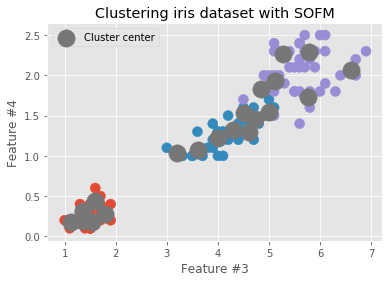

In [12]:
    plt.title('Clustering iris dataset with SOFM')
    plt.xlabel('Feature #3')
    plt.ylabel('Feature #4')

    plt.scatter(*data.T, c=colors[target], s=100, alpha=1)
    cluster_centers = plt.scatter(*sofm.weight, s=300, c=colors[3])

    plt.legend([cluster_centers], ['Cluster center'], loc='upper left')
    plt.savefig('firstexample.png')
    plt.show()

### 2.3. SPACE APPROXIMATION

In the previous example, we tried to do a space approximation. Space approximation is similar to clustering, but the goal is here to find the minimum number of points that cover as much data as possible. Since it’s similar to clustering we can use SOFM here as well. But as we saw in the previous example data points wasn’t using space efficiently and some points were very close to each other and some are further. Now the problem is that clusters don’t know about existence of other clusters and they behave independently. To have more cooperative behavior between clusters we can enable learning radius in SOFM. Let’s try different example. I generated two-dimensional dataset in the shape of the moon that we will try to approximate using SOFM. First, let’s try to do it without increasing learning radius and applying the same micro-clustering technique as before.

#### 2.3.1. EXAMPLE

### `**WARNING.  THE FILE UTILS.PY MUST BE IN YOUR CURRENT DIRECTORY**`


Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = [1, 20]
[OPTION] grid_type = ['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid']
[OPTION] learning_radius = 2
[OPTION] n_inputs = 2
[OPTION] n_outputs = None
[OPTION] reduce_radius_after = 20
[OPTION] reduce_std_after = 50
[OPTION] reduce_step_after = 50
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] std = 2
[OPTION] step = 0.3
[OPTION] verbose = True
[OPTION] weight = Normal(mean=0, std=0.01)

#1 : [39 ms] train: 0.229419
#2 : [47 ms] train: 0.192141
#3 : [31 ms] train: 0.186694
#4 : [31 ms] train: 0.181683
#5 : [47 ms] train: 0.168268


#6 : [43 ms] train: 0.148722
#7 : [45 ms] train: 0.149142
#8 : [38 ms] train: 0.150050
#9 : [31 ms] train: 0.148048
#10 : [31 ms] train: 0.146938
#11 : [47 ms] train: 0.147691


#12 : [46 ms] train: 0.149256
#13 : [40 ms] train: 0.151008
#14 : [38 ms] train: 0.147766
#15 : [31 ms] train: 0.148093
#16 : [31 ms] train: 0.149338
#17 : [47 ms] train: 0.148423


#18 : [44 ms] train: 0.146039
#19 : [41 ms] train: 0.147912
#20 : [39 ms] train: 0.105747


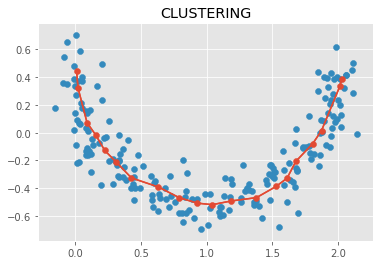

In [13]:
plt.style.use('ggplot')
utils.reproducible()
from utils import plot_2d_grid


if __name__ == '__main__':
    GRID_WIDTH = 20
    GRID_HEIGHT = 1

    data, targets = datasets.make_moons(n_samples=400, noise=0.1)
    data = data[targets == 1]

    sofm = algorithms.SOFM(
        n_inputs=2,
        features_grid=(GRID_HEIGHT, GRID_WIDTH),

        verbose=True,
        shuffle_data=True,

        # The winning neuron will be selected based on the
        # Euclidean distance. For this task it's important
        # that distance is Euclidean. Other distances will
        # not give us the same results.
        distance='euclid',

        learning_radius=2,
        # Reduce learning radius by 1 after every 20 epochs.
        # Learning radius will be equal to 2 during first
        # 20 epochs and on the 21st epoch it will be equal to 1.
        reduce_radius_after=20,

        # 2 Means that neighbour neurons will have high learning
        # rates during the first iterations
        std=2,
        # Defines a rate at which parameter `std` will be reduced.
        # Reduction is monotonic and reduces after each epoch.
        # In 50 epochs std = 2 / 2 = 1 and after 100 epochs
        # std = 2 / 3 and so on.
        reduce_std_after=50,

        # Step (or learning rate)
        step=0.3,
        # Defines a rate at which parameter `step` will reduced.
        # Reduction is monotonic and reduces after each epoch.
        # In 50 epochs step = 0.3 / 2 = 0.15 and after 100 epochs
        # std = 0.3 / 3 = 0.1 and so on.
        reduce_step_after=50,
    )
    sofm.train(data, epochs=20)

    red, blue = ('#E24A33', '#348ABD')

    plt.scatter(*data.T, color=blue)
    plt.scatter(*sofm.weight, color=red)

    weights = sofm.weight.reshape((2, GRID_HEIGHT, GRID_WIDTH))
    plot_2d_grid(weights, color=red)
    plt.title("CLUSTERING")
    

    plt.show()

#### 2.3.2. PERFORMANCE WITH DIFFERENT DATA SETS

You can see that cluster centers are more efficiently distributed along the moon-shaped cluster. Even if we remove data points from the plot the center cluster will give us good understanding about the shape of our original data.

You might ask, what is the use of this application? One of the things that you can do is to use this approach in order to minimize the size of your data sample. The idea is that since feature map spreads out all over the space you can generate smaller dataset that will keep useful properties of the main one. It can be not only useful for training sample minimization, but also for other applications. For instance, in case if you have lots of unlabelled data and labelling can get expensive, you can use the same technique to find smaller sub-sample of the main dataset and label only this subset instead of the random sample.

We can use more than one-dimensional grids in SOFM in order to be able to capture more complicated patterns. In the following example, you can see SOFM with two-dimensional feature map that approximates roughly 8,000 data points using only 100 features.


Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = [10, 10]
[OPTION] grid_type = ['hexagon', 'find_neighbours_on_hexagon_grid', 'find_step_scaler_on_hexagon_grid']
[OPTION] learning_radius = 8
[OPTION] n_inputs = 2
[OPTION] n_outputs = None
[OPTION] reduce_radius_after = 5
[OPTION] reduce_std_after = 5
[OPTION] reduce_step_after = 5
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] std = 2
[OPTION] step = 0.3
[OPTION] verbose = True
[OPTION] weight = Normal(mean=0, std=0.01)



#1 : [1 sec] train: 0.205868


#2 : [1 sec] train: 0.203694


#3 : [1 sec] train: 0.203324


#4 : [1 sec] train: 0.202500


#5 : [1 sec] train: 0.191186


#6 : [1 sec] train: 0.190518


#7 : [1 sec] train: 0.189232


#8 : [1 sec] train: 0.189422


#9 : [1 sec] train: 0.188764


#10 : [1 sec] train: 0.174686


#11 : [1 sec] train: 0.173347


#12 : [1 sec] train: 0.172261


#13 : [1 sec] train: 0.172524


#14 : [1 sec] train: 0.172422


#15 : [1 sec] train: 0.155414


#16 : [1 sec] train: 0.155372


#17 : [1 sec] train: 0.155182


#18 : [1 sec] train: 0.155000


#19 : [1 sec] train: 0.154884


#20 : [1 sec] train: 0.132973


#21 : [1 sec] train: 0.132681


#22 : [1 sec] train: 0.132454


#23 : [1 sec] train: 0.132544


#24 : [1 sec] train: 0.132578


#25 : [1 sec] train: 0.111195


#26 : [1 sec] train: 0.111176


#27 : [1 sec] train: 0.111092


#28 : [1 sec] train: 0.111255


#29 : [1 sec] train: 0.111361


#30 : [1 sec] train: 0.085539


#31 : [1 sec] train: 0.085389


#32 : [1 sec] train: 0.085474


#33 : [1 sec] train: 0.085608


#34 : [1 sec] train: 0.085646


#35 : [1 sec] train: 0.055958


#36 : [1 sec] train: 0.055822


#37 : [1 sec] train: 0.055883


#38 : [1 sec] train: 0.055987


#39 : [1 sec] train: 0.056055


#40 : [783 ms] train: 0.021622

Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = [10, 10]
[OPTION] grid_type = ['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid']
[OPTION] learning_radius = 8
[OPTION] n_inputs = 2
[OPTION] n_outputs = None
[OPTION] reduce_radius_after = 5
[OPTION] reduce_std_after = 5
[OPTION] reduce_step_after = 5
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] std = 2
[OPTION] step = 0.3
[OPTION] verbose = True
[OPTION] weight = Normal(mean=0, std=0.01)



#1 : [1 sec] train: 0.202793


#2 : [1 sec] train: 0.201464


#3 : [1 sec] train: 0.201131


#4 : [1 sec] train: 0.200997


#5 : [1 sec] train: 0.186939


#6 : [1 sec] train: 0.187021


#7 : [1 sec] train: 0.186588


#8 : [1 sec] train: 0.186093


#9 : [1 sec] train: 0.186283


#10 : [1 sec] train: 0.172000


#11 : [1 sec] train: 0.171984


#12 : [1 sec] train: 0.171780


#13 : [1 sec] train: 0.171940


#14 : [1 sec] train: 0.171847


#15 : [1 sec] train: 0.152782


#16 : [1 sec] train: 0.152724


#17 : [1 sec] train: 0.152597


#18 : [1 sec] train: 0.152757


#19 : [1 sec] train: 0.152818


#20 : [1 sec] train: 0.127083


#21 : [1 sec] train: 0.127153


#22 : [1 sec] train: 0.127070


#23 : [1 sec] train: 0.127035


#24 : [1 sec] train: 0.127056


#25 : [1 sec] train: 0.103832


#26 : [1 sec] train: 0.103947


#27 : [1 sec] train: 0.103978


#28 : [1 sec] train: 0.104092


#29 : [1 sec] train: 0.104072


#30 : [1 sec] train: 0.076753


#31 : [1 sec] train: 0.076749


#32 : [1 sec] train: 0.076681


#33 : [1 sec] train: 0.076639


#34 : [1 sec] train: 0.076704


#35 : [1 sec] train: 0.052160


#36 : [1 sec] train: 0.052083


#37 : [1 sec] train: 0.052090


#38 : [1 sec] train: 0.052128


#39 : [1 sec] train: 0.052056


#40 : [1 sec] train: 0.021766


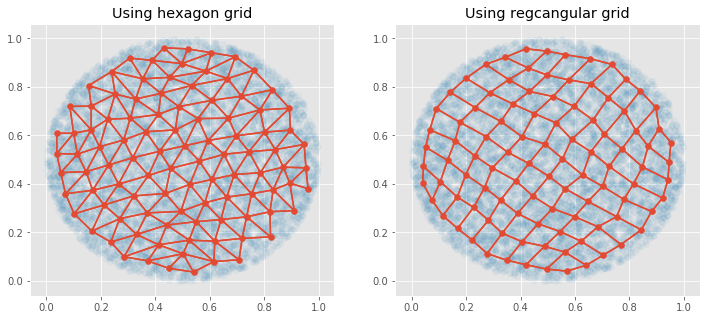

In [14]:

import matplotlib.pyplot as plt
from neupy import algorithms, utils

from utils import plot_2d_grid, make_circle


plt.style.use('ggplot')
utils.reproducible()


if __name__ == '__main__':
    GRID_WIDTH = 10
    GRID_HEIGHT = 10

    configurations = [{
        'grid_type': 'hexagon',
        'use_hexagon_grid': True,
        'title': 'Using hexagon grid',
    }, {
        'grid_type': 'rect',
        'use_hexagon_grid': False,
        'title': 'Using regcangular grid',
    }]

    data = make_circle()

    red, blue = ('#E24A33', '#348ABD')
    n_columns = len(configurations)

    plt.figure(figsize=(12, 5))

    for index, conf in enumerate(configurations, start=1):
        sofm = algorithms.SOFM(
            n_inputs=2,
            features_grid=(GRID_HEIGHT, GRID_WIDTH),

            verbose=True,
            shuffle_data=True,
            grid_type=conf['grid_type'],

            learning_radius=8,
            reduce_radius_after=5,

            std=2,
            reduce_std_after=5,

            step=0.3,
            reduce_step_after=5,
        )
        sofm.train(data, epochs=40)
        plt.subplot(1, n_columns, index)

        plt.title(conf['title'])
        plt.scatter(*data.T, color=blue, alpha=0.05)
        plt.scatter(*sofm.weight, color=red)

        weights = sofm.weight.reshape((2, GRID_HEIGHT, GRID_WIDTH))
        plot_2d_grid(weights, color=red, hexagon=conf['use_hexagon_grid'])

    plt.show()
       

#### 2.3.3. SENSITIVITY TO INITIAL CONDITIONS


Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = [4, 4]
[OPTION] grid_type = ['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid']
[OPTION] learning_radius = 8
[OPTION] n_inputs = 2
[OPTION] n_outputs = None
[OPTION] reduce_radius_after = 5
[OPTION] reduce_std_after = 5
[OPTION] reduce_step_after = 5
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] std = 2
[OPTION] step = 0.3
[OPTION] verbose = True
[OPTION] weight = Uniform(0, 1)


Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = [4, 4]
[OPTION] grid_type = ['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid']
[OPTION] learning_radius = 8
[OPTION] n_inputs = 2
[OPTION] n_outputs = None
[OPTION] reduce_radius_after = 5
[OPTION] reduce_std_after = 5
[OPTION] reduce_step_after = 5
[OPTION] show_epoch = 1
[OPTION] shuffle_

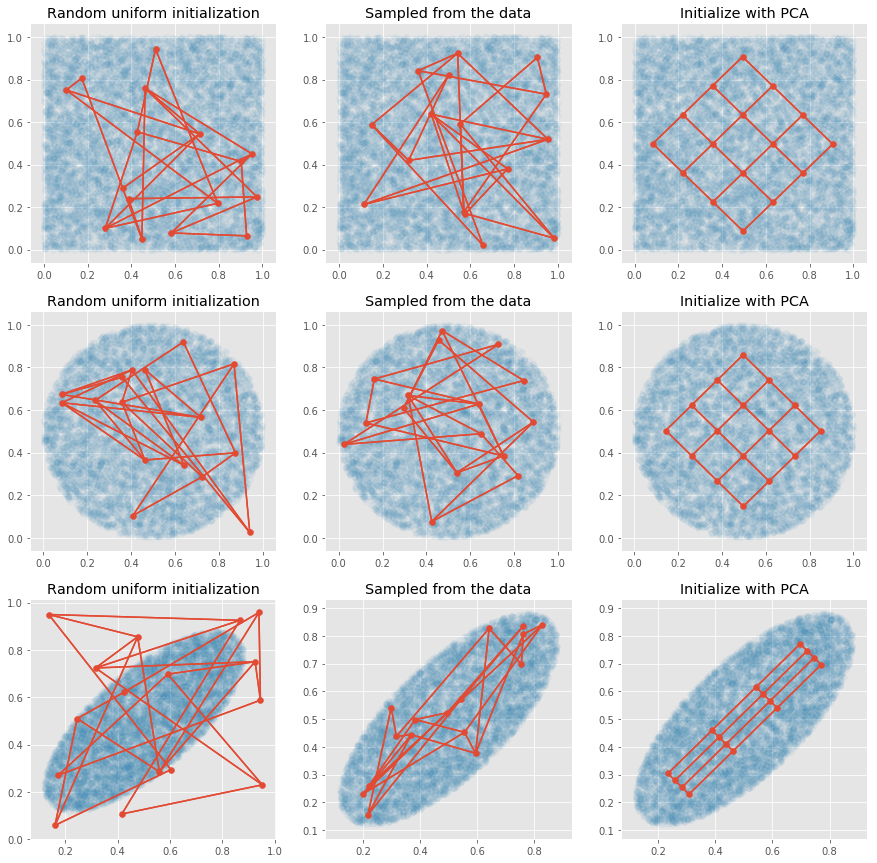

In [15]:
from itertools import product

import matplotlib.pyplot as plt
from neupy import algorithms, utils, init

from utils import plot_2d_grid, make_circle, make_elipse, make_square


plt.style.use('ggplot')
utils.reproducible()


if __name__ == '__main__':
    GRID_WIDTH = 4
    GRID_HEIGHT = 4

    datasets = [
        make_square(),
        make_circle(),
        make_elipse(corr=0.7),
    ]
    configurations = [{
        'weight_init': init.Uniform(0, 1),
        'title': 'Random uniform initialization',
    }, {
        'weight_init': 'sample_from_data',
        'title': 'Sampled from the data',
    }, {
        'weight_init': 'init_pca',
        'title': 'Initialize with PCA',
    }]

    plt.figure(figsize=(15, 15))
    plt.title("Compare weight initialization methods for SOFM")

    red, blue = ('#E24A33', '#348ABD')
    n_columns = len(configurations)
    n_rows = len(datasets)
    index = 1

    for data, conf in product(datasets, configurations):
        sofm = algorithms.SOFM(
            n_inputs=2,
            features_grid=(GRID_HEIGHT, GRID_WIDTH),

            verbose=True,
            shuffle_data=True,
            weight=conf['weight_init'],

            learning_radius=8,
            reduce_radius_after=5,

            std=2,
            reduce_std_after=5,

            step=0.3,
            reduce_step_after=5,
        )

        if not sofm.initialized:
            sofm.init_weights(data)

        plt.subplot(n_rows, n_columns, index)

        plt.title(conf['title'])
        plt.scatter(*data.T, color=blue, alpha=0.05)
        plt.scatter(*sofm.weight, color=red)

        weights = sofm.weight.reshape((2, GRID_HEIGHT, GRID_WIDTH))
        plot_2d_grid(weights, color=red)

        index += 1
    plt.savefig("secondexample.png")
    plt.show()

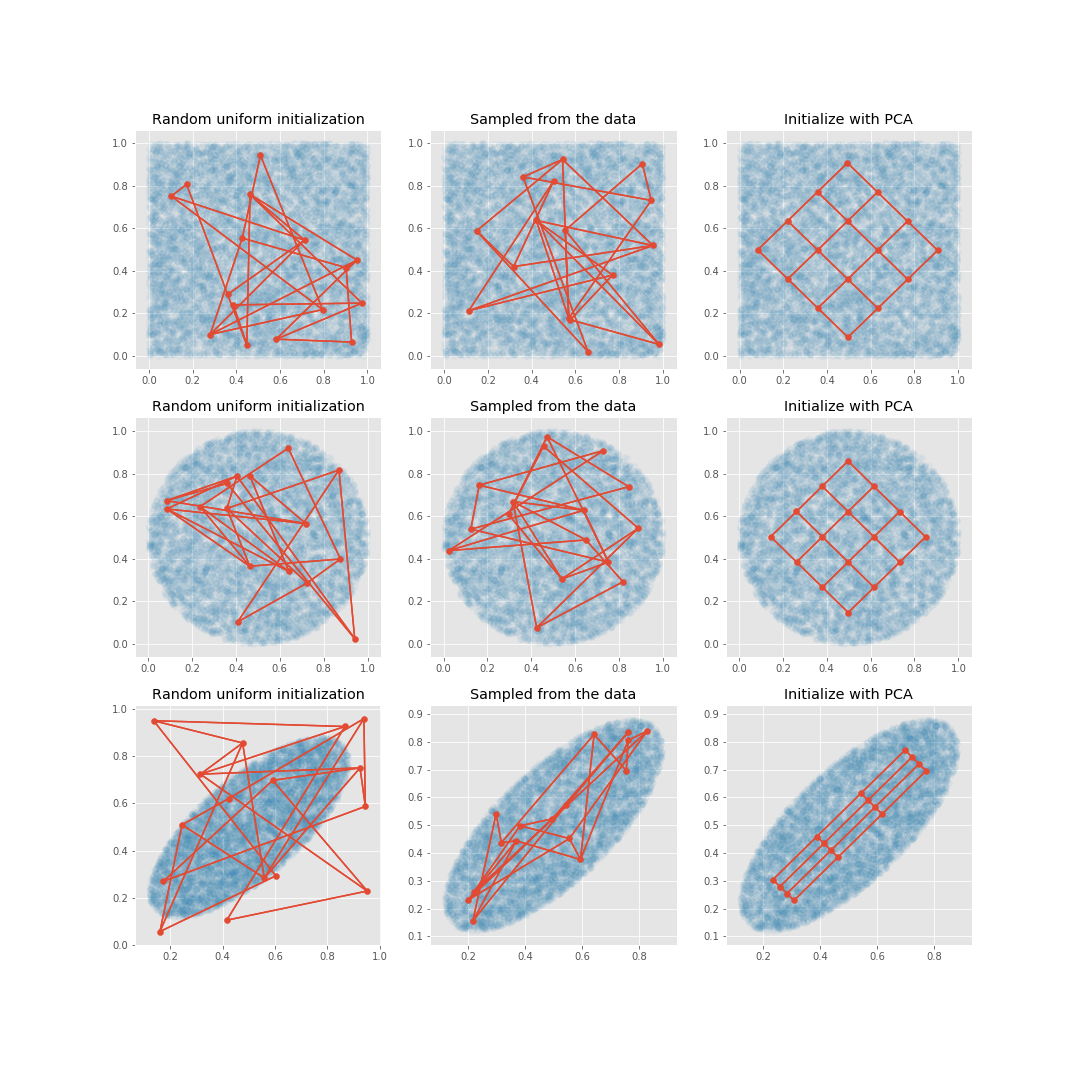

In [17]:
from IPython.display import Image
Image("secondexample.png")

### 2.6. HIGH DIMENSIONAL DATA VISUALIZATION

**NOTE** A future statement is a directive to the compiler that a particular module should be compiled using syntax or semantics that will be available in a specified future release of Python. The future statement is intended to ease migration to future versions of Python that introduce incompatible changes to the language. It allows use of the new features on a per-module basis before the release in which the feature becomes standard.

We used SOFM with two-dimensional feature map in order to catch dimensional properties of the datasets with only two features. If we increase number of dimensions to three it still would be possible to visualize the result, but in four dimensions it will become a bit trickier.

If we use two-dimensional grid and train SOFM over the high-dimensional data then we can encode network as a heat map where each neuron in the network will be represented by the average distance to its neighbors.

As the example, let’s take a look at the breast cancer dataset available in the scikit-learn library. This dataset has 30 features and two classes.

Let’s look what we can get if we apply described method on the 30-dimensional data.

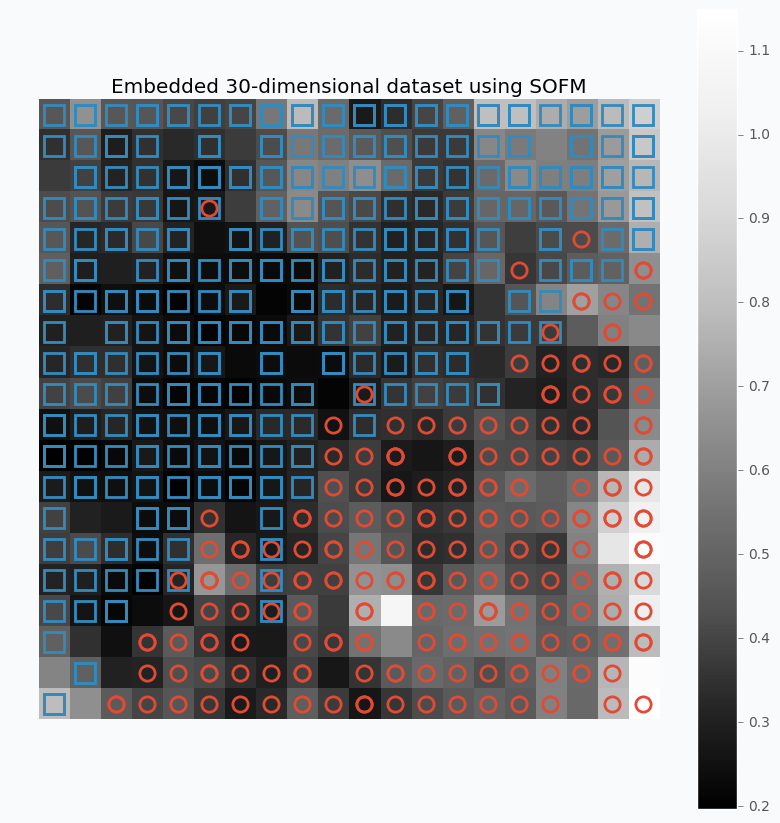

For this example, I used SOFM with 20x20 feature map. Which basically means that we have 400 micro-clusters. Most of the micro-clusters has either blue squares or red circles and just a few of them has both or none of the classes.

You can see how micro-clusters with blue squares are tended to be close to each other, and the same true for red circles. In fact, we can even draw simple bound that will separate two different classes from each other. Along this bound we can see some cases where micro-cluster has red and blue classes which means that at some places these samples sit very tight. In other cases, like in the left down corner, we can see parts that do not belong to any of the classes which means that there is a gap between data points.


#### SAME SAMPLE BUT USING DIGITS AS CLASSES
You can also notice that each cell in the heat map has different color. From the colorbar, we can see that black color encodes small numbers and white color encodes large numbers. Each cell has a number associated with it that defines average distance to neighbor clusters. The white color means that cluster is far away from it’s neighbors. Group of the red circles on the right side of the plot has white color, which means that this group is far from the main cluster.

One problem is that color depends on the average distance which can be misleading in some cases. We can build a bit different visualization that will encode distance between two separate micro-clusters as a single value.

Now between every feature and its neighbor there is an extra square. As in the previous example each square encodes distance between two neighboring features. We do not consider two features in the map as neighbors in case if they connected diagonally. That’s why all diagonal squares between two micro-clusters color in black. Diagonals are a bit more difficult to encode, because in this case we have two different cases. In order to visualize it we can also take an average of these distances.

More interesting way to make this type of visualization can be with the use of images. In previous case, we use markers to encode two different classes. With images, we can use them directly as the way to represent the cluster. Let’s try to apply this idea on small dataset with images of digits from 0 to 9.


Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = [40, 40]
[OPTION] grid_type = ['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid']
[OPTION] learning_radius = 5
[OPTION] n_inputs = 64
[OPTION] n_outputs = None
[OPTION] reduce_radius_after = 20
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] std = 1
[OPTION] step = 0.5
[OPTION] verbose = True
[OPTION] weight = Normal(mean=0, std=0.01)



#1 : [767 ms] train: 2.421919


#2 : [774 ms] train: 2.148798


#3 : [826 ms] train: 2.097239


#4 : [751 ms] train: 2.085253


#5 : [773 ms] train: 2.082984


#6 : [765 ms] train: 2.059884


#7 : [762 ms] train: 2.070770


#8 : [766 ms] train: 2.065354


#9 : [754 ms] train: 2.067114


#10 : [786 ms] train: 2.061239


#11 : [760 ms] train: 2.050616


#12 : [767 ms] train: 2.058361


#13 : [795 ms] train: 2.045913


#14 : [775 ms] train: 2.043559


#15 : [798 ms] train: 2.047993


#16 : [855 ms] train: 2.052609


#17 : [898 ms] train: 2.040919


#18 : [883 ms] train: 2.035039


#19 : [920 ms] train: 2.045693


#20 : [881 ms] train: 1.905370


#21 : [880 ms] train: 1.899415


#22 : [842 ms] train: 1.900669


#23 : [815 ms] train: 1.896967


#24 : [810 ms] train: 1.882780


#25 : [802 ms] train: 1.891311


#26 : [775 ms] train: 1.884189


#27 : [782 ms] train: 1.879071


#28 : [804 ms] train: 1.883792


#29 : [796 ms] train: 1.881719


#30 : [853 ms] train: 1.880335


#31 : [832 ms] train: 1.880402


#32 : [805 ms] train: 1.882312


#33 : [801 ms] train: 1.877617


#34 : [784 ms] train: 1.881437


#35 : [830 ms] train: 1.865803


#36 : [749 ms] train: 1.872404


#37 : [764 ms] train: 1.855602


#38 : [745 ms] train: 1.865701


#39 : [781 ms] train: 1.868459


#40 : [751 ms] train: 1.730191


#41 : [770 ms] train: 1.726304


#42 : [753 ms] train: 1.722028


#43 : [744 ms] train: 1.722532


#44 : [762 ms] train: 1.718585


#45 : [774 ms] train: 1.717671


#46 : [767 ms] train: 1.710691


#47 : [761 ms] train: 1.714256


#48 : [830 ms] train: 1.712904


#49 : [793 ms] train: 1.708359


#50 : [797 ms] train: 1.704105


#51 : [775 ms] train: 1.705918


#52 : [753 ms] train: 1.703657


#53 : [765 ms] train: 1.706233


#54 : [771 ms] train: 1.703441


#55 : [770 ms] train: 1.707770


#56 : [760 ms] train: 1.705442


#57 : [781 ms] train: 1.705437


#58 : [791 ms] train: 1.707295


#59 : [822 ms] train: 1.701726


#60 : [839 ms] train: 1.514154


#61 : [794 ms] train: 1.506607


#62 : [802 ms] train: 1.509722


#63 : [803 ms] train: 1.507263


#64 : [817 ms] train: 1.507916


#65 : [815 ms] train: 1.504989


#66 : [907 ms] train: 1.504033


#67 : [917 ms] train: 1.500114


#68 : [923 ms] train: 1.498317


#69 : [875 ms] train: 1.501532


#70 : [807 ms] train: 1.502702


#71 : [789 ms] train: 1.498716


#72 : [817 ms] train: 1.497286


#73 : [808 ms] train: 1.496793


#74 : [785 ms] train: 1.498559


#75 : [800 ms] train: 1.497040


#76 : [825 ms] train: 1.500158


#77 : [798 ms] train: 1.497116


#78 : [825 ms] train: 1.495015


#79 : [799 ms] train: 1.492936


#80 : [785 ms] train: 1.286402


#81 : [773 ms] train: 1.253091


#82 : [819 ms] train: 1.246552


#83 : [805 ms] train: 1.243445


#84 : [833 ms] train: 1.243801


#85 : [769 ms] train: 1.244216


#86 : [772 ms] train: 1.239484


#87 : [911 ms] train: 1.238685


#88 : [867 ms] train: 1.236747


#89 : [828 ms] train: 1.240268


#90 : [803 ms] train: 1.237948


#91 : [815 ms] train: 1.237003


#92 : [790 ms] train: 1.237841


#93 : [801 ms] train: 1.235904


#94 : [808 ms] train: 1.236283


#95 : [801 ms] train: 1.235824


#96 : [784 ms] train: 1.237230


#97 : [788 ms] train: 1.235673


#98 : [798 ms] train: 1.234011


#99 : [792 ms] train: 1.233396


#100 : [816 ms] train: 0.812889
Building visualization...
Progress: 0.00%
Progress: 2.50%
Progress: 5.00%
Progress: 7.50%
Progress: 10.00%
Progress: 12.50%
Progress: 15.00%
Progress: 17.50%
Progress: 20.00%
Progress: 22.50%
Progress: 25.00%
Progress: 27.50%
Progress: 30.00%
Progress: 32.50%
Progress: 35.00%
Progress: 37.50%
Progress: 40.00%
Progress: 42.50%
Progress: 45.00%
Progress: 47.50%
Progress: 50.00%
Progress: 52.50%
Progress: 55.00%
Progress: 57.50%
Progress: 60.00%
Progress: 62.50%
Progress: 65.00%
Progress: 67.50%
Progress: 70.00%
Progress: 72.50%
Progress: 75.00%
Progress: 77.50%
Progress: 80.00%
Progress: 82.50%
Progress: 85.00%
Progress: 87.50%
Progress: 90.00%
Progress: 92.50%
Progress: 95.00%
Progress: 97.50%
Visualization has been built succesfully


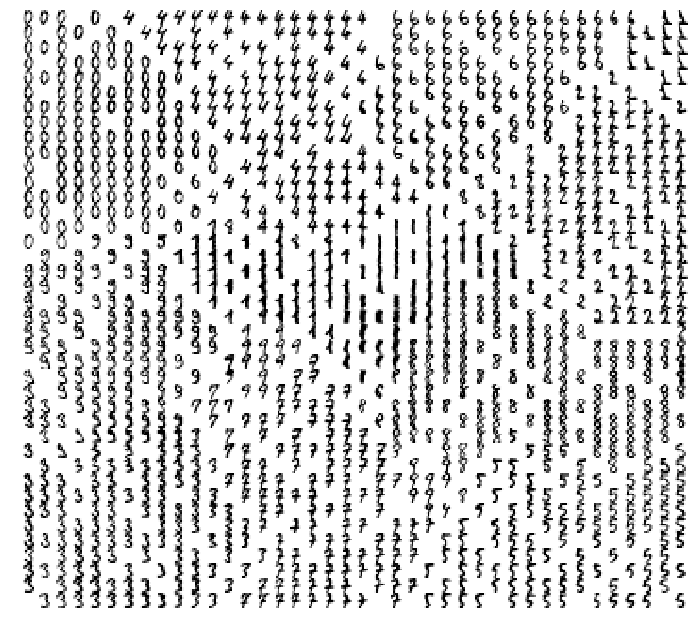

In [5]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import datasets
from neupy import algorithms, utils


utils.reproducible()

GRID_HEIGHT = 40
GRID_WIDTH = 40

digits = datasets.load_digits()
data = digits.data

sofm = algorithms.SOFM(
    n_inputs=64,
    features_grid=(GRID_HEIGHT, GRID_WIDTH),

    # Learning radius defines area within which we find
    # winning neuron neighbours. The higher the value
    # the more values we will be updated after each iteration.
    learning_radius=5,
    # Every 20 epochs learning radius will be reduced by 1.
    reduce_radius_after=20,

    step=0.5,
    std=1,

    shuffle_data=True,
    verbose=True,
)

sofm.train(data, epochs=100)
clusters = sofm.predict(data).argmax(axis=1)

print("Building visualization...")
plt.figure(figsize=(12, 11))

grid = gridspec.GridSpec(GRID_HEIGHT, GRID_WIDTH)
grid.update(wspace=0, hspace=0)

for row_id in range(GRID_HEIGHT):
    print("Progress: {:.2%}".format(row_id / GRID_HEIGHT))

    for col_id in range(GRID_WIDTH):
        index = row_id * GRID_HEIGHT + col_id
        clustered_samples = data[clusters == index]

        if len(clustered_samples) > 0:
            # We take the first sample, but it can be any
            # sample from this cluster
            sample = clustered_samples[0]

        else:
            # If we don't have samples in cluster then
            # it means that there is a gap in space
            sample = np.zeros(64)

        plt.subplot(grid[index])
        plt.imshow(sample.reshape((8, 8)), cmap='Greys')
        plt.axis('off')

print("Visualization has been built succesfully")
plt.savefig("thirdexample.png")


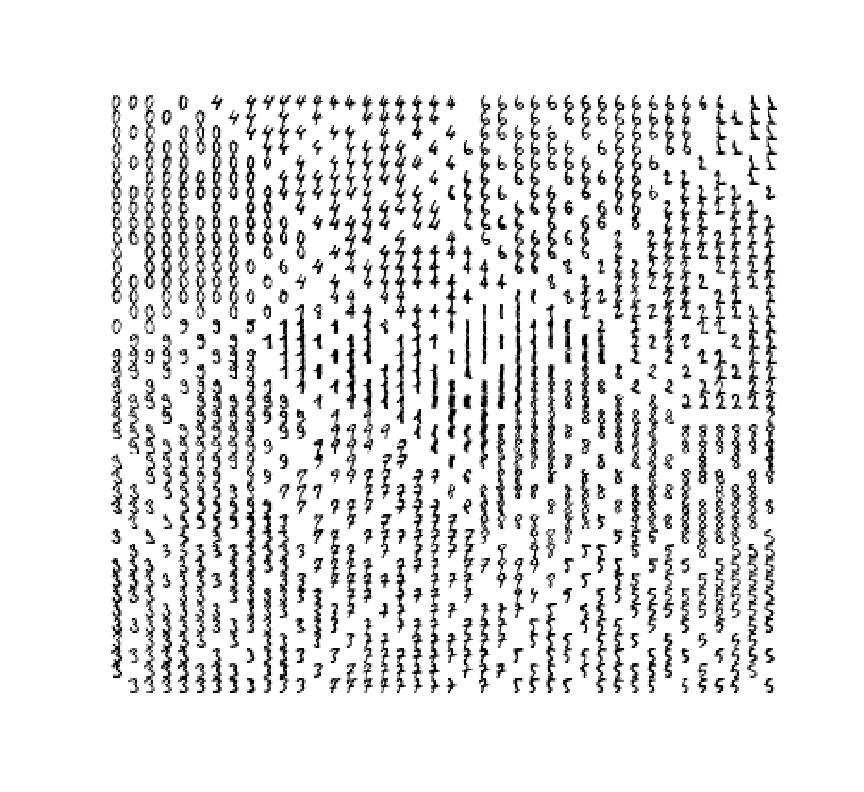

In [6]:
from IPython.display import Image
Image("thirdexample.png")